In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [4]:
train_generator = train_datagen.flow_from_directory( '/content/drive/MyDrive/INTERNSHIP/training_set',
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='binary',
                                                     subset='training')

Found 6404 images belonging to 2 classes.


In [5]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


In [6]:

val_generator = train_datagen.flow_from_directory( '/content/drive/MyDrive/INTERNSHIP/training_set',
                                                  target_size=(IMG_SIZE, IMG_SIZE),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary',
subset='validation')

Found 1601 images belonging to 2 classes.


In [7]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5426 - loss: 0.7954

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 1141s 5s/step - accuracy: 0.5428 - loss: 0.7949 - val_accuracy: 0.6646 - val_loss: 0.6082
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 1232s 6s/step - accuracy: 0.6823 - loss: 0.6029 - val_accuracy: 0.7158 - val_loss: 0.5585
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 796s 4s/step - accuracy: 0.7403 - loss: 0.5171 - val_accuracy: 0.7102 - val_loss: 0.5390
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 807s 4s/step - accuracy: 0.7768 - loss: 0.4431 - val_accuracy: 0.7502 - val_loss: 0.5424
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 810s 4s/step - accuracy: 0.8480 - loss: 0.3454 - val_accuracy: 0.7383 - val_loss: 0.5857


In [10]:
model.save('/content/drive/MyDrive/INTERNSHIP/training_set/DOG_VS_CAT.h5')

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model("/content/drive/MyDrive/INTERNSHIP/training_set/DOG_VS_CAT.h5")
print('Model Loaded')

Model Loaded


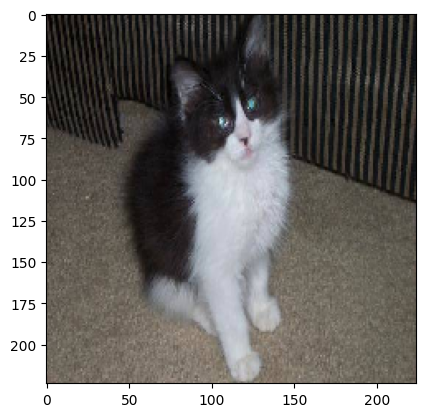

In [16]:
test_image_path="/content/drive/MyDrive/INTERNSHIP/CATVSDOG/CAT/cat.129.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [17]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.

In [18]:
prediction = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [19]:
print(prediction)
if prediction <= 0.5:
  print("The Given Image Is CAT")
else:
    print("The Given Image Is DOG")

[[0.08043668]]
The Given Image Is CAT


DOWNLOAD THE DATASET FROM MY G-DRIVE LINK GIVEN BELOW:

https://drive.google.com/drive/folders/1pSRO-ak_37Q8zQFWGkJ54fA8YGTGGSh2?usp=sharinghttps://drive.google.com/drive/folders/1pSRO-ak_37Q8zQFWGkJ54fA8YGTGGSh2?usp=sharing
